<a href="https://colab.research.google.com/github/Soumik969/first-repo/blob/main/Ksp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

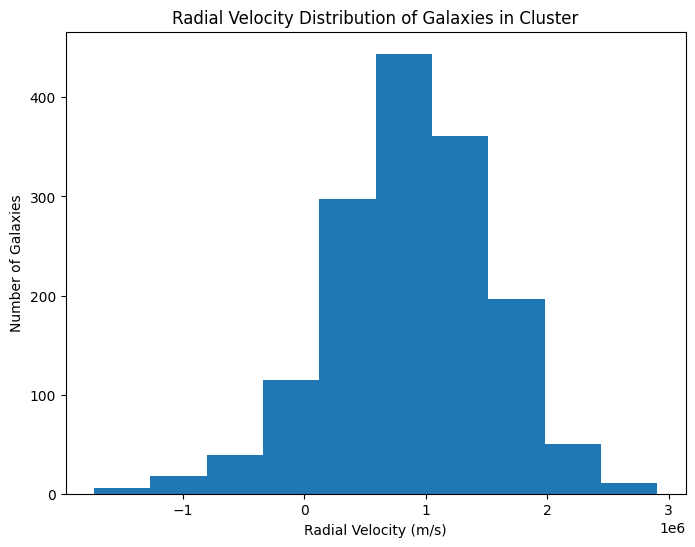

In [3]:
c = 3e8
Halpha_rest = 6562.8
galaxy_data = pd.read_csv('galaxy.csv')
galaxy_data['redshift'] = (galaxy_data['Observed Wavelength of H-alpha'] - Halpha_rest) / Halpha_rest
galaxy_data['radial_velocity'] = galaxy_data['redshift'] * c
plt.figure(figsize=(8, 6))
plt.hist(galaxy_data['radial_velocity'])
plt.xlabel('Radial Velocity (m/s)')
plt.ylabel('Number of Galaxies')
plt.title('Radial Velocity Distribution of Galaxies in Cluster')
plt.show()

In [4]:
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

In [5]:
#part 1.a
max_ra = galaxy_data['RA J2000.0'].max()
min_ra = galaxy_data['RA J2000.0'].min()
max_dec = galaxy_data['Dec J2000.0'].max()
min_dec = galaxy_data['Dec J2000.0'].min()

angular_width = max_ra - min_ra
angular_height = max_dec - min_dec

print("Approximate Angular Width:", angular_width, "degrees")
print("Approximate Angular Height:", angular_height, "degrees")


Approximate Angular Width: 1.807083333333333 degrees
Approximate Angular Height: 31.495833333333334 degrees


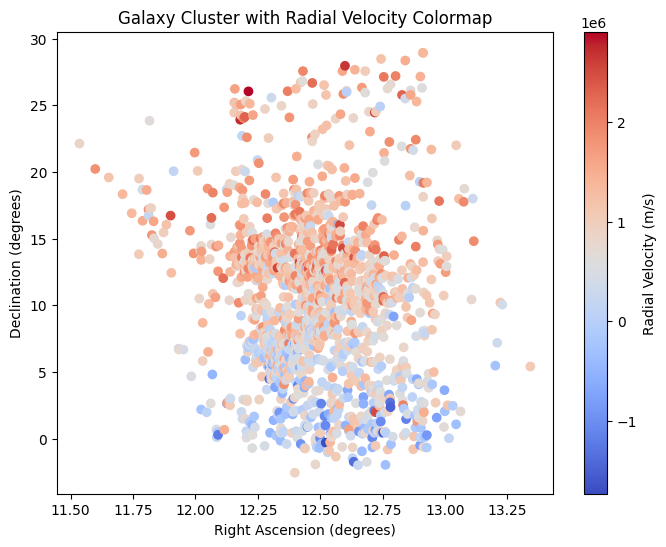

In [6]:
#part 1.b
plt.figure(figsize=(8, 6))
plt.scatter(galaxy_data['RA J2000.0'], galaxy_data['Dec J2000.0'], c=galaxy_data['radial_velocity'], cmap='coolwarm')
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Galaxy Cluster with Radial Velocity Colormap')
plt.colorbar(label='Radial Velocity (m/s)')
plt.show()


Alpha (slope): -1.750162556886607
Beta (intercept): 0.4529616510303396


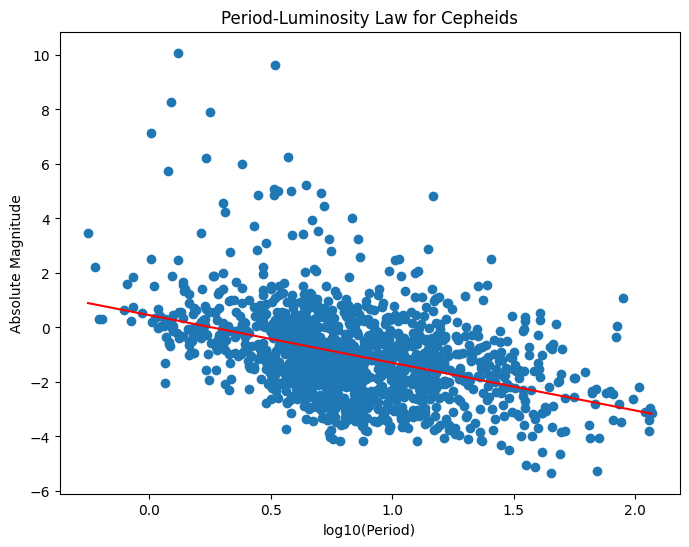

In [7]:
#part 2
gaia_data = pd.read_csv('gaia.csv')
pc_to_m = 3.086e16  # 1 parsec in meters

# Calculation of absolute magnitude (M) from parallax (mas) and apparent magnitude (m)
def calculate_absolute_magnitude(parallax, apparent_magnitude):
    distance_modulus = 5 * np.log10(1000 / parallax) - 5 # parallax is in milli-arcseconds
    return apparent_magnitude - distance_modulus # function for getting absolute magnitude(M)

gaia_data['Absolute Magnitude'] = calculate_absolute_magnitude(gaia_data['parallax'], gaia_data['mean apparent magnitude'])

gaia_data['log10(Period)'] = np.log10(gaia_data['time period'])

coefficients = np.polyfit(gaia_data['log10(Period)'], gaia_data['Absolute Magnitude'], 1)
alpha = coefficients[0]
beta = coefficients[1]

# Print the alpha and beta values
print("Alpha (slope):", alpha)
print("Beta (intercept):", beta)

# Plot for time period and absolute mag
plt.figure(figsize=(8, 6))
plt.scatter(gaia_data['log10(Period)'], gaia_data['Absolute Magnitude'])

# Plot the best fit line using alpha and beta
x_fit = np.array([gaia_data['log10(Period)'].min(), gaia_data['log10(Period)'].max()])
y_fit = alpha * x_fit + beta
plt.plot(x_fit, y_fit, color='red')

plt.xlabel('log10(Period)')
plt.ylabel('Absolute Magnitude')
plt.title('Period-Luminosity Law for Cepheids')
plt.show()
# so here i got alpha and beta by plotting the best fit line in the graph

In [8]:
from scipy import stats
cepheid_data = pd.read_csv('cepheid.csv')

# Outlier Handling (Example using z-score method)
def remove_outliers_zscore(NC, column, threshold=3):
    z_scores = stats.zscore(NC[column])
    return NC[np.abs(z_scores) < threshold]

cepheid_data = remove_outliers_zscore(cepheid_data, 'Apparent Magnitude')
cepheid_data = remove_outliers_zscore(cepheid_data, 'Period')

# Calculation of Absolute Magnitude (M)
cepheid_data['M'] = alpha * np.log10(cepheid_data['Period']) + beta

# Calculation of Distance
def calculate_distance(m, M):
    distance_modulus = m - M
    distance = 10 ** ((distance_modulus + 5) / 5)  # In parsecs
    return distance

cepheid_data['distance'] = calculate_distance(cepheid_data['Apparent Magnitude'], cepheid_data['M'])

# Finding distance to each galaxy
galaxy_distances = cepheid_data.groupby('Galaxy_ID')['distance'].mean()
print(galaxy_distances)

Galaxy_ID
2MASXJ12194916+0511061    1.656871e+07
2MASXJ12362919+1818022    1.597280e+07
AGC213178                 7.904388e+03
AGC215145                 1.626632e+07
AGC215716                 1.340275e+07
                              ...     
VCC615                    1.499540e+07
VLSB-B                    1.571398e+07
VLSB-D                    1.608729e+07
[SDV2005]230              1.411888e+07
[TH2002]230               1.570378e+07
Name: distance, Length: 1459, dtype: float64


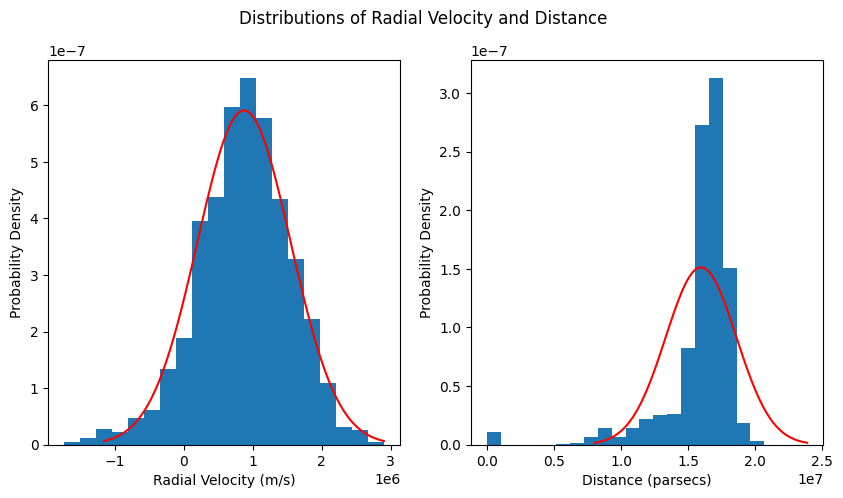

Hubble's Constant (H): 54.73 km/s/Mpc ± 43.22 km/s/Mpc


In [9]:
from scipy.stats import norm

radial_velocities = galaxy_data['radial_velocity']  # Assumes radial velocities are in m/s

# Fit Gaussian distributions
rv_mean, rv_std = norm.fit(radial_velocities)
d_mean, d_std = norm.fit(galaxy_distances.values)

# Plotting histograms with Gaussian fits
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(radial_velocities, bins=20, density=True)
x_rv = np.linspace(rv_mean - 3*rv_std, rv_mean + 3*rv_std, 100)
plt.plot(x_rv, norm.pdf(x_rv, loc=rv_mean, scale=rv_std), color='red')
plt.xlabel('Radial Velocity (m/s)')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(galaxy_distances, bins=20, density=True)
x_d = np.linspace(d_mean - 3*d_std, d_mean + 3*d_std, 100)
plt.plot(x_d, norm.pdf(x_d, loc=d_mean, scale=d_std), color='red')
plt.xlabel('Distance (parsecs)')
plt.ylabel('Probability Density')

plt.suptitle('Distributions of Radial Velocity and Distance')
plt.show()

# Estimate Hubble's Constant (H0)
H = rv_mean/d_mean
# Calculate uncertainty (you might need to adjust this)
H_error_margin = H * np.sqrt((rv_std/rv_mean)**2 + (d_std/d_mean)**2)

print(f"Hubble's Constant (H): {H*1000:.2f} km/s/Mpc ± {H_error_margin*1000:.2f} km/s/Mpc")

# --- Answering Questions (Q4.1 and Q4.2) ---
# Q4.1: Compare your H0 with the generally accepted value (~70 km/s/Mpc).
#        Convert your units if needed.
# Q4.2: Propose reasons for discrepancies. Consider measurement errors,
#      assumptions in the model, peculiar motions of galaxies, etc.


In [13]:

G = 6.674e-11  # Gravitational constant (m^3 kg^-1 s^-2)
Ms=2.0e30  # Mass of sun
MILKY_WAY_MASS = 2e11 *Ms  # Visible mass of Milky Way (kg)

# Kinetic Energy Calculation
total_KE = np.sum(0.5 * MILKY_WAY_MASS * galaxy_data['radial_velocity']**2)
average_KE = total_KE / len(galaxy_data)

# Calculation of average inverese distance
d_inv=np.sum(1/galaxy_distances)/3.086e22
avg_d=d_inv/len(galaxy_distances)
# Approximate Radius of Cluster
#cluster_radius = 1 * 3.086e22  # Placeholder - assume 1 Megaparsec (convert to meters)

# Total Mass Estimation (Virial Theorem)
total_mass = (2* average_KE ) / (G*MILKY_WAY_MASS*avg_d*1e7)
print("Estimated Total Mass of Galaxy Cluster:", total_mass, "kg")

M0 = -21
visible_mass= np.sum(pow(1.4,-1/3.5)*MILKY_WAY_MASS*10**((gaia_data['Absolute Magnitude']-M0)/(-2.5*3.5)))
# Mass-Luminosity relation
# L/L0 = (m/m0)^3.5
# Absolute magnitude M-M0 = -2.5 log(L/L0) = -2.5*3.5 log(m/m0)
print(f"Total visible mass of the galaxy cluster is {visible_mass} kg")

# Dark Matter Calculation
dark_matter_mass = total_mass - visible_mass
dark_matter_fraction = (dark_matter_mass / total_mass) * 100
print("Estimated Dark Matter Mass:", dark_matter_mass, "kg")
print("Estimated Dark Matter Fraction:", dark_matter_fraction, "%")


Estimated Total Mass of Galaxy Cluster: 1.3694806282054718e+43 kg
Total visible mass of the galaxy cluster is 2.7987068616545513e+42 kg
Estimated Dark Matter Mass: 1.0896099420400167e+43 kg
Estimated Dark Matter Fraction: 79.56373530217877 %
